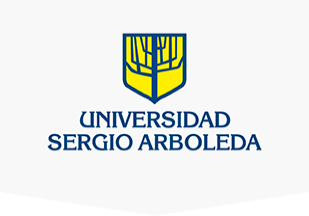

**Bogotá DC, 22 de diciembre del 2022**

**Universidad Sergio Arboleda**

**Ciencias de la Computación e inteligencia Artificial**

**Computación Paralela y Distribuida**

**Jesús Chaves Acero**

**Comparativa de rendimiento entre Python y optimización en Cython**





# **1. Resumen:**

Se desarrolla un experimento donde se realiza la comparativa del rendimiento en tiempos de ejecución entre un programa desarrollado en Python y este mismo siendo optimizado en Cython, básicamente, lo que se busca es cuantificar de manera aproximada la mejora en tiempos de ejecución de acuerdo a la optimización que se logra en Cython, sin ahondar en profundidad en dicho lenguaje. Se realizaran dos experimentos, el primero consiste en desarrollar un algoritmo para el cálculo de la regresión lineal utilizando el método de mínimos cuadrados ordinarios. El segundo programa…


# **2. Introducción:**

Cython es un lenguaje de programación para simplificar la escritura de módulos de extensión para Python en C y C++. Siendo estrictos, la sintaxis de Cython es la misma de Python pero con algunos agregados. Se pueden llamar funciones en C, o funciones/métodos de C++, directamente desde el código en Cython. Es posible usar tipos estáticos en las variables (enteros, flotantes, o cualquier tipo de dato). Cython compila a código en C o C++ desde Python, y el resultado puede ser usado desde Python como un "Módulo de extensión", o como una aplicación embebida en el intérprete CPython.

Para recordar, Python es un lenguaje interpretado y utiliza una máquina virtual que genera bytecode (lo cual le permite ser independiente de la plataforma donde se ejecuta), en cambio, C lee todo el código de fuente antes de ejecutar(podría ser lento al compilar pero muy rápido al ejecutarse).

<img src=https://coffeebytes.dev/python-vs-javascript-2022-cual-es-el-mejor/images/codigo-compilado-vs-interpretado.png>


# **3. Primera experimentación: Regresión Lineal**

La regresión lineal es una técnica de modelado estadístico que se emplea para describir una variable de respuesta continua como una función de una o varias variables predictoras. Puede ayudar a comprender y predecir el comportamiento de sistemas complejos o a analizar datos experimentales, financieros y biológicos.

Las técnicas de regresión lineal permiten crear un modelo lineal. Este modelo describe la relación entre una variable dependiente 𝓨 (también conocida como la respuesta) como una función de una o varias variables independientes 𝓧ᵢ (denominadas predictores). La ecuación general que correspondiente a un modelo de regresión lineal simple es:

* $y = m\cdot x + b$

* $m = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad$ Pendiente de la recta

* $b = \bar{y} - a\bar{x}\quad$ Intercepto

Donde: 

* $\sigma{_x}^{2} = \sum_{i=1}^{n} (x_i - \bar{x})^2\quad$ Varianza

* $S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})\quad$ Covarianza


<img src=https://la.mathworks.com/discovery/linear-regression/_jcr_content/mainParsys/columns/4a00ee99-d2e4-4625-991c-ded888e86b86/image.adapt.full.medium.jpg/1666260999882.jpg>

Ejemplo de regresión lineal simple que muestra cómo predecir el número de accidentes de tráfico mortales en un estado (variable de respuesta, 𝓨) en comparación con la población del estado (variable predictora,  𝑿)

# **3.1. Metodología primer algoritmo:**

Para el desarrollo del primer benchmark, se implementará el método simple de mínimos cuadrados ordinarios para el cálculo de la regresión lineal, este es el enfoque más simple para realizar un análisis de regresión de una variable dependiente y explicativa, pero los cálculos que se realizan para un set de datos lo suficientemente grande representará una diferencia significativa para la comparación del rendimiento respecto a los tiempos de ejecución del algoritmo desarrollado puramente en Python ([linear_regression_py.py](https://github.com/jchaves1406/Cython_performance/blob/main/Regresion_lineal/linear_regression_py.py)) y su respectiva optimización en Cython ([linear_regression_cy.pyx](https://github.com/jchaves1406/Cython_performance/blob/main/Regresion_lineal/linear_regression_cy.pyx)). El objetivo de la regresión lineal es encontrar la recta que mejor se ajuste a través de un conjunto de datos y que minimice la suma del error cuadrático respecto a la pendiente de la recta, todo esto mediante el algoritmo de los mínimos cuadrados ordinarios.

Al desarrollar el algoritmo en Python se procede a optimizar la misma estructura del código en Cython. Para esta experimentación se hará una optimización muy superficial únicamente declarando los tipos de variables a manejar en C, así mismo las funciones que retornan algún tipo de variable. Para los cálculos de los tiempos de ejecución se realiza un fichero ([performance.py](https://github.com/jchaves1406/Cython_performance/blob/main/Regresion_lineal/performance.py)) en Python, el cual funciona como lanzador del programa para así poder realizar varios experimentos consecutivos con el fin de sacar un tiempo promedio y así reducir el ruido Gaussiano en la experimentación en una secuencia. El lanzador ejecuta 30 repeticiones para cada conjunto de datos. Por último se obtiene un valor representativo de acuerdo al tiempo de ejecución promedio de las iteraciones por experimento (30).

Se realizan 6 experimentos los cuales partirán desde un conjunto de datos de 1’000.000 para coordenadas (x, y), dichas coordenadas se van a generar de manera aleatoria para cada experimentación. A lo largo de cada iteración experimental (6) se aumentará el tamaño del dataset en 1’000.000 para finalizar en 6’000.000 de datos en el experimento final. Luego de la experimentación se procede a realizar el análisis entre los tiempos de ejecución respecto a la complejidad de cálculos que está representado en el aumento de la cantidad de datos a procesar de cada experimento.



# **3.2. Análisis y resultados:**

Se realiza un pequeño análisis exploratorio de los datos generados por el lanzador los cuales fueron guardados en un archivo de texto delimitado por comas ([data_regression.csv](https://github.com/jchaves1406/Cython_performance/blob/main/Regresion_lineal/data_regression.csv)). El Análisis nos ayudará a identificar qué tan grande es el error (varianza) entre los tiempos de ejecución tomados para cada experimentación y así poder obtener un valor representativo para el tiempo de cada experimento. Por último se realizará una gráfica de barras para observar la comparativa en el rendimiento del algoritmo optimizado en Cython respecto a Python.

### **Importe de librerias:** Pandas, Numpy, Matplotlib

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Se crea objeto pandas con el fin de manipular el dataset generado por el lanzador
data_regression = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/Cython_performance/main/Regresion_lineal/data_regression.csv')
data_regression.head(5)

,1_Million_py,1_Million_cy,2_Million_py,2_Million_cy,3_Million_py,3_Million_cy,4_Million_py,4_Million_cy,5_Million_py,5_Million_cy,6_Million_py,6_Million_cy
0,0.664428,0.002909,1.334018,0.005641,2.029613,0.008780,2.669665,0.011483,3.353254,0.014847,16.022706,0.078213
1,0.669089,0.002953,1.336182,0.005772,2.043289,0.008575,2.671557,0.011274,3.364632,0.014774,16.050639,0.068057
2,0.687837,0.002860,1.339396,0.005761,2.028827,0.008419,2.692952,0.011782,3.352677,0.015092,16.029673,0.077807
3,0.678421,0.002910,1.340346,0.005841,2.031129,0.008761,2.681843,0.011153,3.357847,0.015106,16.026044,0.078016
4,0.671280,0.002980,1.340036,0.005743,2.026555,0.008664,2.681789,0.011102,3.350465,0.014392,16.032756,0.078048


El método **DataFrame.describe()** genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos. Este método describe muchas cosas sobre un conjunto de datos. Una cosa importante es que el método describe () trata solo con valores numéricos. No funciona con valores categóricos.

Para entender mejor las estadísticas que se generan con el método describe():
* **count** nos dice el número de filas no vacías (NaN) en una variable.
* **mean** nos dice el valor medio de esa variable.
* **std** nos dice el valor de desviación estándar de esa variable.
* **min** nos dice el valor mínimo de esa variable.
* **25%, 50% y 75%** son el percentil / cuartil de cada variable. Esta información de cuartiles ayuda a detectar valores atípicos.
* **max** nos dice el valor máximo de esa variable.

Fuente: [pandas docs(DataFrame.describe)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)

In [17]:
data_regression.describe().T

,count,mean,std,min,25%,50%,75%,max
1_Million_py,30.0,0.673339,0.006411,0.664428,0.669810,0.670920,0.675114,0.689260
1_Million_cy,30.0,0.002910,0.000048,0.002815,0.002874,0.002904,0.002949,0.002995
2_Million_py,30.0,1.341053,0.007653,1.334018,1.338650,1.340158,1.341565,1.378654
2_Million_cy,30.0,0.005775,0.000104,0.005560,0.005716,0.005766,0.005869,0.005960
3_Million_py,30.0,2.028786,0.011629,2.015571,2.021408,2.027070,2.030558,2.069433
3_Million_cy,30.0,0.008610,0.000126,0.008351,0.008527,0.008600,0.008679,0.008829
4_Million_py,30.0,2.684788,0.011248,2.669665,2.680563,2.682053,2.686853,2.733222
4_Million_cy,30.0,0.011380,0.000250,0.010899,0.011206,0.011331,0.011586,0.011950
5_Million_py,30.0,3.357747,0.010867,3.345529,3.350332,3.357985,3.364324,3.399113
5_Million_cy,30.0,0.014707,0.000513,0.013995,0.014305,0.014726,0.015069,0.016138


Se observa que la desviación estandar es supremamente baja, lo cual representa que la variacion aproximada entre los tiempos de ejecución a lo largo de las 30 iteraciones es muy leve. Dada la pequeña magnitud de la desviación, se puede considerar que el valor promedio del tiempo en cada experimentación es un valor representativo para cada conjunto de datos.

In [18]:
# Se obtienen los datos representativos de cada experimentación
y = list(round(data_regression.mean(), 6))
y_cy, y_py = [], []
for i in range(12):
  if i % 2 == 0:
    y_py.append(y[i])
  else:
    y_cy.append(y[i])

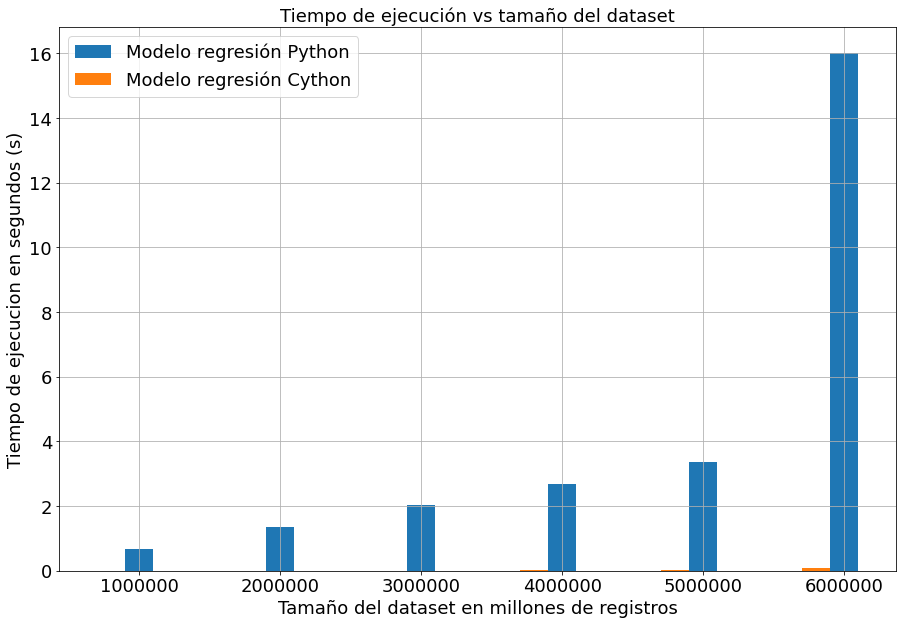

In [19]:
# Se realiza una grafica de barras para la visualización del rendimiento de cada modelo
x = np.arange(len(y_cy))
width = 0.2
plt.figure(figsize=(15,10))
plt.bar(x, y_py, width=width, label='Modelo regresión Python')
plt.bar(x - width, y_cy, width=width, label='Modelo regresión Cython')
plt.xticks(x, (x+1)*1000000, fontsize=18)
plt.yticks(fontsize=18)
plt.title('Tiempo de ejecución vs tamaño del dataset', fontsize=18)
plt.xlabel('Tamaño del dataset en millones de registros', fontsize=18)
plt.ylabel('Tiempo de ejecucion en segundos (s)', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.grid()
plt.show()

* Se observa una mejora de rendimiento bastante considerable de el modelo optimizado en Cython el cual representa una mejora del mismo cerca a

# **3.3. Conclusiones especificas primera experimentación:**

Se realizan unas pequeñas conclusiones en base a la experimentacion de la implementacion del algoritmo en Cython y las sensaciones que transmite, mas adelante se realizan las conclusiones del desempeño en general.

* Se puede emular el comportamiento de Python como C especificando tipos para las variables. Esto puede acelerar las cosas en órdenes de magnitud. Convierte a Cython en un lenguaje "híbrido" que mezcla la sintaxis de Python con capacidades de C.

* El código se puede crear con base en prototipos desarrollados en Python y reescribir paso a paso en el contexto de la documentación original.

* En el caso de Cython, es especialmente bueno que las funciones de Python y C se puedan combinar para obtener lo mejor de ambas: Productividad y eficiencia del código, esto se logra cuando se antepone cpdef a la función en especifico la cual puede ser vista por Python y C en el momento de ejecución.

# **4. Segunda experimentacion:** Distancia euclideana todos con todos


La distancia euclidiana se calcula desde el centro de la celda de origen hasta el centro de cada una de las celdas circundantes. La distancia euclidiana se calcula en cada una de las herramientas de distancia. Conceptualmente, el algoritmo euclidiano funciona del siguiente modo: para cada celda, la distancia a cada celda de origen se determina al calcular la hipotenusa con x_max y y_max como los otros dos lados del triángulo. Este cálculo deriva la verdadera distancia euclidiana, en vez de la distancia de la celda. Se determina la distancia más corta a un origen, y si es menor que la distancia máxima especificada, el valor se asigna a la ubicación de la celda en el ráster de salida.

<img src=https://desktop.arcgis.com/es/arcmap/10.3/tools/spatial-analyst-toolbox/GUID-B6170E16-50FB-45FB-A724-E24251CDF305-web.gif>


Los valores de salida para el ráster de distancia euclidiana son los valores de distancia de puntos flotantes. Si la celda está a la misma distancia de dos o más orígenes, la celda se asigna al origen que se encontró primero en el proceso de escaneo. No se puede controlar este proceso de escaneo.

La descripción anterior solo es una representación conceptual de cómo se derivan los valores. El algoritmo real calcula la información mediante un proceso secuencial de dos escaneos. La velocidad de la herramienta en este proceso es independiente del número de celdas de origen, la distribución de celdas de origen y la distancia máxima especificada. El único factor que influye en la velocidad con la que se ejecuta la herramienta es el tamaño del ráster. El tiempo de cómputo es linealmente proporcional al número de celdas en la ventana Análisis.

Sea un conjunto de con $N$ datos bidimensionales ($D=2$) donde queremos calcular la distancia euclidiana de cada dato con todos los demás, es decir una matriz donde el elemento $ij$ es 

$$
\text{dist}_{ij} = \sqrt {\sum_{k=1}^D (x_{ik} - x_{jk})^2}
$$




# **4.1. Metodología segundo algoritmo:**

Se realiza un algoritmo que realiza el cálculo de la distancia euclidiana para un set de datos, esta experimentación representa un grado de complejidad mayor a nivel de cálculo ya que realiza el cálculo de raíces lo cual conlleva gran estrés a nivel computacional. 

Al desarrollar el algoritmo en Python se procede a optimizar la misma estructura del código en Cython. Para esta experimentación se hará una optimización más sensible en los tipos de datos, de manera que se presume supondrá un aumento en el rendimiento. Para los cálculos de los tiempos de ejecución se realiza un fichero (performance.py) en Python, el cual funciona como lanzador del programa para así poder realizar varios experimentos consecutivos con el fin de sacar un tiempo promedio y así reducir el ruido Gaussiano en la experimentación en una secuencia. El lanzador ejecuta 30 repeticiones para cada conjunto de datos. Por último, se obtiene un valor representativo de acuerdo al tiempo de ejecución promedio de las iteraciones por experimento (30). 

Se realizan 6 experimentos los cuales partirán desde un conjunto de datos de 500 números aleatorios generados con numpy y una precisión de 3 decimales A lo largo de cada iteración experimental (6) se aumentará el tamaño del dataset en 500 para finalizar en 3000 de datos en el experimento final. Luego de la experimentación se procede a realizar el análisis entre los tiempos de ejecución respecto a la complejidad de cálculos que está representado en el aumento de la cantidad de datos a procesar de cada experimento. 

# **4.2. Análisis y resultados:**

Al igual que la primera experimentacion, se realiza un pequeño análisis exploratorio de los datos generados por el lanzador los cuales fueron guardados en un archivo de texto delimitado por comas ([data_regression.csv](https://github.com/jchaves1406/Cython_performance/blob/main/Regresion_lineal/data_regression.csv)). El Análisis nos ayudará a identificar qué tan grande es el error (varianza) entre los tiempos de ejecución tomados para cada experimentación y así poder obtener un valor representativo para el tiempo de cada experimento. Por último se realizará una gráfica de barras para observar la comparativa en el rendimiento del algoritmo optimizado en Cython respecto a Python.

In [20]:
# Se crea objeto pandas con el fin de manipular el dataset generado por el lanzador
data_euclidean_distance = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/Cython_performance/main/Euclidean_distance/euclidean_distance.csv')
data_euclidean_distance.head(5)

,Python_500,Cython_V1_500,Cython_V2_500,Python_500.1,Cython_V1_500.1,Cython_V2_500.1,Python_500.2,Cython_V1_500.2,Cython_V2_500.2,Python_500.3,Cython_V1_500.3,Cython_V2_500.3,Python_500.4,Cython_V1_500.4,Cython_V2_500.4,Python_500.5,Cython_V1_500.5,Cython_V2_500.5
0,0.449861,0.335444,0.001626,1.799402,1.340404,0.006818,3.994866,1.442401,0.013810,7.092376,1.538444,0.030518,11.184335,2.397073,0.062215,15.993395,3.508079,0.097954
1,0.450547,0.328908,0.001094,1.787358,1.305495,0.004806,4.003967,1.423528,0.010883,7.062373,1.544325,0.026032,11.138124,2.400310,0.062314,16.220911,3.668994,0.098038
2,0.447540,0.311823,0.001098,1.799351,1.323666,0.004918,3.984463,1.483037,0.011443,7.121012,1.523446,0.025235,11.110781,2.410824,0.062106,16.168488,3.488139,0.098263
3,0.450183,0.327428,0.000989,1.774184,1.322153,0.004859,3.969193,1.478036,0.010601,7.111524,1.531716,0.025660,11.108495,2.394034,0.062694,16.042378,3.446750,0.098818
4,0.447850,0.306190,0.000988,1.762508,1.313977,0.004838,3.961351,1.476550,0.011013,7.132380,1.536187,0.025251,11.130016,2.407285,0.062955,15.957497,3.446082,0.099501


In [21]:
data_euclidean_distance.describe().T

,count,mean,std,min,25%,50%,75%,max
Python_500,30.0,0.446447,0.004494,0.441010,0.443623,0.445105,0.448402,0.463687
Cython_V1_500,30.0,0.319778,0.008272,0.297454,0.316831,0.320624,0.324358,0.335444
Cython_V2_500,30.0,0.001061,0.000117,0.000944,0.001021,0.001047,0.001069,0.001626
Python_500.1,30.0,1.779831,0.016428,1.755336,1.765500,1.779516,1.787908,1.809654
Cython_V1_500.1,30.0,1.312250,0.027417,1.230061,1.303062,1.321636,1.329324,1.344084
Cython_V2_500.1,30.0,0.004938,0.000367,0.004526,0.004846,0.004882,0.004945,0.006818
Python_500.2,30.0,3.991317,0.024707,3.946546,3.970969,3.991995,4.009251,4.038257
Cython_V1_500.2,30.0,1.452928,0.036726,1.355427,1.454125,1.462300,1.470584,1.506109
Cython_V2_500.2,30.0,0.011088,0.000589,0.010519,0.010826,0.011036,0.011175,0.013810
Python_500.3,30.0,7.078124,0.035091,7.021413,7.055465,7.069278,7.099958,7.171077


Se observa que la desviación estandar es supremamente baja, lo cual representa que la variacion aproximada entre los tiempos de ejecución a lo largo de las 30 iteraciones es muy leve. Dada la pequeña magnitud de la desviación, se puede considerar que el valor promedio del tiempo en cada experimentación es un valor representativo para cada conjunto de datos.

In [27]:
# Se obtienen los datos representativos de cada experimentación
y = list(round(data_euclidean_distance.mean(), 6))
y_py, y_cy_v1, y_cy_v2 = [], [], []
y_py.append(y[0])
y_cy_v1.append(y[1])
y_cy_v2.append(y[2])
y_py.append(y[3])
y_cy_v1.append(y[4])
y_cy_v2.append(y[5])
y_py.append(y[6])
y_cy_v1.append(y[7])
y_cy_v2.append(y[8])
y_py.append(y[9])
y_cy_v1.append(y[10])
y_cy_v2.append(y[11])
y_py.append(y[12])
y_cy_v1.append(y[13])
y_cy_v2.append(y[14])
y_py.append(y[15])
y_cy_v1.append(y[16])
y_cy_v2.append(y[17])

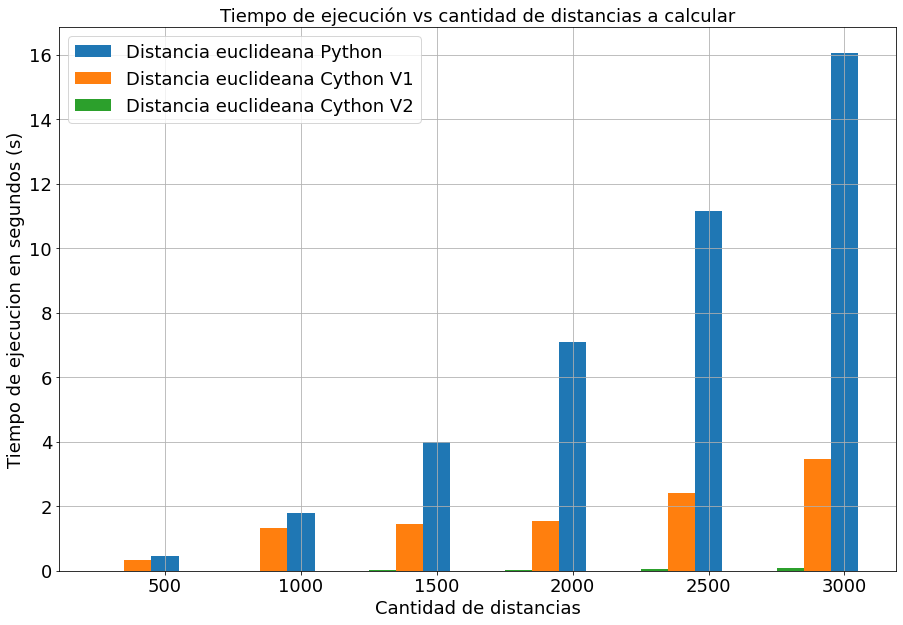

In [32]:
# Se realiza una grafica de barras para la visualización del rendimiento de cada modelo
x = np.arange(len(y_cy))
width = 0.2
plt.figure(figsize=(15,10))
plt.bar(x, y_py, width=width, label='Distancia euclideana Python')
plt.bar(x - width, y_cy_v1, width=width, label='Distancia euclideana Cython V1')
plt.bar(x - width - width, y_cy_v2, width=width, label='Distancia euclideana Cython V2')
plt.xticks(x, (x+1)*500, fontsize=18)
plt.yticks(fontsize=18)
plt.title('Tiempo de ejecución vs cantidad de distancias a calcular', fontsize=18)
plt.xlabel('Cantidad de distancias', fontsize=18)
plt.ylabel('Tiempo de ejecucion en segundos (s)', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.grid()
plt.show()

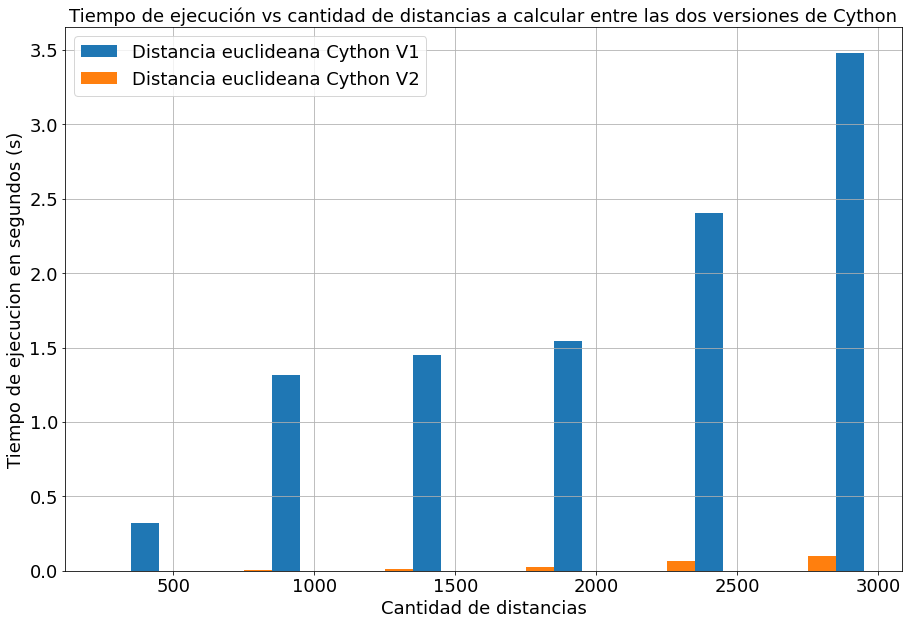

In [33]:
# Se realiza una grafica de barras para la visualización del rendimiento de las versiones de Cython
x = np.arange(len(y_cy))
width = 0.2
plt.figure(figsize=(15,10))
plt.bar(x - width, y_cy_v1, width=width, label='Distancia euclideana Cython V1')
plt.bar(x - width - width, y_cy_v2, width=width, label='Distancia euclideana Cython V2')
plt.xticks(x, (x+1)*500, fontsize=18)
plt.yticks(fontsize=18)
plt.title('Tiempo de ejecución vs cantidad de distancias a calcular entre las dos versiones de Cython', fontsize=18)
plt.xlabel('Cantidad de distancias', fontsize=18)
plt.ylabel('Tiempo de ejecucion en segundos (s)', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.grid()
plt.show()

# **4.3. Conclusiones especificas segunda experimentación:**

* Se observa una enorme mejora en el rendimiento para la primera versión de Cython, únicamente seleccionando el tipo de variable respecto al algoritmo inicial en Python. 

* Se observa que en la implementación de la segunda versión de Cython dónde se realiza un llamado a las funciones de C desde Python y además se deshabilitan las comprobaciones de Python presenta un rendimiento muchísimo mayor en tiempos de ejecución.

* Se puede concluir que al dedicar y ahondar más tiempo en la optimización en Cython se logra incrementar el rendimiento hasta un 300% respecto al algoritmo implementado únicamente en Python. 

# **5. Conclusiones generales:**

A partir de la experimentación se puede concluir que:

* El desempeño en tiempos de ejecución es sustancialmente amplio analizando la optimización realizada en Cython.

* Si bien la mejora es bastante considerable respecto a los tiempos de Python, estos podrían mejorar aún más si se profundiza un poco más en la optimización del código, cabe recordar que dicha optimización para esta experimentación fue bastante superficial.

* Es recomendable hacer un análisis costo/beneficio del tiempo invertido en la optimización del código respecto al rendimiento conseguido, es decir, encontrar un punto de equilibrio dado que a mayor profundización en la optimización, mayor será el tiempo invertido lo cual a partir de un punto llega a ser ineficiente dado que el aumento en el rendimiento (tiempo de ejecución) será cada vez menor.

* De acuerdo a lo anterior la optimización debería concentrarse en las secciones más lentas y/o costosas a nivel computacional: cuellos de botella

* Si se requiere un mayor rendimiento en los tiempos ejecución es recomendable hacer uso de librerías propias de C, tales como MPI u OpenMP dado que tenemos acceso a ellas si estamos trabajando con Cython, las cuales sirven para aprovechar el uso de los cores a disponer del procesador según la arquitectura del procesador en el cual se está ejecutando la aplicación e incluso interconectar nodos de cómputo adicionales.

* De momento el comportamiento de mejoría es lineal, lo cual podría variar teniendo en cuenta el punto anterior, es decir, si usaramos computación en paralelo lo cual sería de gran utilidad al correr aplicaciones con mayor exigencia computacional.

* Para la experimentación es recomendable aislar lo más que se pueda el nodo de cómputo el cual está corriendo la aplicación, esto con el fin de minimizar errores y la varianza entre resultados causados por tareas secundarias que puedan influir o alterar los tiempos de ejecución.


# **6. Bibliografia:**
* https://desktop.arcgis.com/es/arcmap/10.3/tools/spatial-analyst-toolbox/understanding-euclidean-distance-analysis.htm

* https://la.mathworks.com/discovery/linear-regression.html

* https://cython.org/
